In [70]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [81]:
X_train = torch.Tensor([[1],[2],[3]])
Y_train = torch.Tensor([[3],[6],[9]])
W = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)

optimizer = optim.Adam([W,b], lr=0.001,amsgrad=False)

#torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
#torch.optim.AdamW(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01, amsgrad=False)
#torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
epoch = 10000
for i in range(1,epoch+1,1):
    hypothesis = W * X_train +b
    cost = torch.mean((hypothesis-Y_train)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step() 
    # 위 세 문장은 반복시 꼭 써주어야한다.
    if (i % 1000 == 0 ):
        print("Epoch : {0} Weight : {1:.3f} Bias : {2:.3f} Loss : {3:.3f}".format(i,W.item(),b.item(),cost.item()))
        #그리려고 할때에는 값을 numpy로 바꾸어 주고 진행해야한다.
        temp = cost.detach().numpy()
        ## var . detach().numpy()로 numpy array로 바꾸어주자
X_test = torch.Tensor([4])
print(X_test*W+b)

TypeError: unsupported format string passed to Tensor.__format__

In [72]:
!pip install matplotlib

In [80]:
class mylinear(nn.Module):
    def __init__(self,input_size,output_size):
        super(mylinear,self).__init__()
        self.linear = nn.Linear(input_size,output_size)
    def forward(self,x):
        return self.linear(x)
linear = mylinear(1,1)
optimizer_2 = optim.SGD(linear.parameters(),lr= 0.01)
for i in range(1,epoch+1):
    hypothesis2 = linear.forward(X_train) - Y_train
    cost = F.mse_loss(hypothesis2 , Y_train)
    optimizer_2.zero_grad()
    cost.backward(retain_graph=True)
    optimizer_2.step()
    if i % 1000 == 0 :
        print(cost)


tensor(0.0078, grad_fn=<MseLossBackward>)
tensor(6.3329e-05, grad_fn=<MseLossBackward>)
tensor(5.1859e-07, grad_fn=<MseLossBackward>)
tensor(4.3177e-09, grad_fn=<MseLossBackward>)
tensor(2.7596e-10, grad_fn=<MseLossBackward>)
tensor(2.0198e-10, grad_fn=<MseLossBackward>)
tensor(2.0198e-10, grad_fn=<MseLossBackward>)
tensor(2.0198e-10, grad_fn=<MseLossBackward>)
tensor(2.0198e-10, grad_fn=<MseLossBackward>)
tensor(2.0198e-10, grad_fn=<MseLossBackward>)


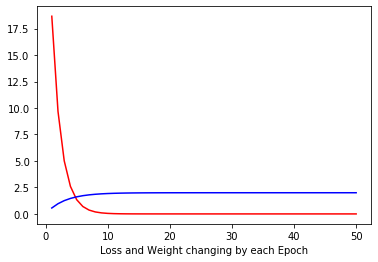

In [100]:
import torch
import torch.nn as nn
import numpy
import matplotlib.pyplot as plt
x_train = torch.Tensor([[1],[2],[3]])
y_train = torch.Tensor([[2],[4],[6]])
w = torch.zeros(1)
lr = 0.01
epoch_list = numpy.linspace(1,50)
loss_list = []
weight_list = []
for i in epoch_list:
    hypothesis = x_train * w 
    cost = torch.mean(((hypothesis) - y_train) **2)
    gradient = torch.sum(x_train * 2 * (hypothesis - y_train))
    w = w - gradient * lr
    loss_list.append(cost)
    weight_list.append(w)
plt.plot(epoch_list,loss_list,'r',epoch_list,weight_list,'b')
plt.xlabel('Loss and Weight changing by each Epoch')
plt.show()
    


In [90]:

W2 = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([W2],lr = 0.01)
for epoch in range(1,51):
    hypothesis = x_train * W2
    cost = torch.mean(((hypothesis) - y_train) **2)
    print("Epoch : {0}, Weight {1:.2f}, Cost : {2:.2f}".format(epoch,W2.item(),cost.item()))
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch : 1, Weight 0.00, Cost : 18.67
Epoch : 2, Weight 0.19, Cost : 15.34
Epoch : 3, Weight 0.36, Cost : 12.61
Epoch : 4, Weight 0.51, Cost : 10.37
Epoch : 5, Weight 0.65, Cost : 8.52
Epoch : 6, Weight 0.77, Cost : 7.01
Epoch : 7, Weight 0.89, Cost : 5.76
Epoch : 8, Weight 0.99, Cost : 4.74
Epoch : 9, Weight 1.09, Cost : 3.89
Epoch : 10, Weight 1.17, Cost : 3.20
Epoch : 11, Weight 1.25, Cost : 2.63
Epoch : 12, Weight 1.32, Cost : 2.16
Epoch : 13, Weight 1.38, Cost : 1.78
Epoch : 14, Weight 1.44, Cost : 1.46
Epoch : 15, Weight 1.49, Cost : 1.20
Epoch : 16, Weight 1.54, Cost : 0.99
Epoch : 17, Weight 1.58, Cost : 0.81
Epoch : 18, Weight 1.62, Cost : 0.67
Epoch : 19, Weight 1.66, Cost : 0.55
Epoch : 20, Weight 1.69, Cost : 0.45
Epoch : 21, Weight 1.72, Cost : 0.37
Epoch : 22, Weight 1.74, Cost : 0.30
Epoch : 23, Weight 1.77, Cost : 0.25
Epoch : 24, Weight 1.79, Cost : 0.21
Epoch : 25, Weight 1.81, Cost : 0.17
Epoch : 26, Weight 1.83, Cost : 0.14
Epoch : 27, Weight 1.84, Cost : 0.11
Epoch 

In [92]:
torch.manual_seed(1)